In [260]:
from yfinance import *
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [401]:
from yahoofinancials import YahooFinancials

stocks=["AC.PA","ACA.PA",
"AI.PA","AIR.PA","ATO.PA","BN.PA","BNP.PA","CA.PA","CAP.PA","DG.PA","EN.PA","ENGI.PA",
"FP.PA","GLE.PA","HO.PA","KER.PA","LR.PA","MC.PA","ML.PA","OR.PA","ORA.PA","RI.PA","SAN.PA",
"SGO.PA","SU.PA","SW.PA","UG.PA","VIE.PA","VIV.PA","WLN.PA"]

#stocks=["AC.PA","ACA.PA","FP.PA"]

allcolumns=['date', 'high', 'low', 'open', 'close', 'volume', 'adjclose','formatted_date', 'Stock']
columns=['formatted_date','high','low','open','close','volume','adjclose','Stock']

def getStock(stock,dateStart,dateEnd,df):
    yahoo_financials = YahooFinancials(stock)

    data=yahoo_financials.get_historical_price_data(dateStart, dateEnd, 'daily')
    data_df = pd.DataFrame.from_dict(data, orient='index')
    dfItem = pd.DataFrame.from_records(data_df['prices'][0])
    dfItem['Stock']=stock
    df = df.append(dfItem)
    return df

def getAllStock(stocks,dateStart,dateEnd,df):
    for item in stocks:
        df=getStock(item,dateStart,dateEnd,df)
    return df[columns]

#log(Vclosure_di/Vclosure_d(i+1))
def getLogReturn(multi_df):
    log_return=np.log(multi_df['adjclose'].unstack()/multi_df['adjclose'].unstack().shift(1)).dropna()
    return log_return

In [402]:
df = pd.DataFrame(columns=allcolumns) 
df = getAllStock(stocks,'2020-02-02','2020-11-8',df)

#Group prices by (date,stock)
multi = df.set_index(['formatted_date', 'Stock'])
multi.unstack

<bound method DataFrame.unstack of                             high        low       open      close     volume  \
formatted_date Stock                                                           
2020-02-03     AC.PA   37.410000  36.980000  37.139999  37.410000   973974.0   
2020-02-04     AC.PA   37.930000  37.139999  37.580002  37.740002   987600.0   
2020-02-05     AC.PA   38.990002  37.590000  37.660000  38.480000  1371847.0   
2020-02-06     AC.PA   39.110001  38.549999  38.770000  38.669998   810048.0   
2020-02-07     AC.PA   38.740002  37.700001  38.480000  38.029999   794272.0   
...                          ...        ...        ...        ...        ...   
2020-11-02     WLN.PA  64.139999  63.320000  63.799999  63.759998  1336780.0   
2020-11-03     WLN.PA  64.540001  63.759998  63.980000  64.419998  1009326.0   
2020-11-04     WLN.PA  66.839996  63.939999  64.059998  66.400002  1095016.0   
2020-11-05     WLN.PA  68.879997  66.779999  67.519997  68.620003  1031793.0   
2020-

In [403]:
log_return = getLogReturn(multi)
log_return

Stock,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,DG.PA,...,ORA.PA,RI.PA,SAN.PA,SGO.PA,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA,WLN.PA
formatted_date,,,,,,,,,,,,,,,,,,,,,
2020-02-04,0.008783,0.018069,0.008305,0.031805,0.042185,0.008485,0.019462,0.014342,0.017823,0.016774,...,-0.013370,0.014543,0.010899,0.015529,0.024108,0.010822,0.015748,0.000750,0.008398,-0.007051
2020-02-05,0.019418,0.037490,0.014555,-0.008149,0.001519,-0.003003,0.006471,0.007095,0.000861,0.017940,...,-0.001981,-0.006297,0.015351,0.010030,0.016243,-0.002280,0.019598,0.004859,0.006747,0.054315
2020-02-06,0.004925,0.020486,0.002221,0.000876,0.024742,0.008168,0.015997,0.009594,0.015378,-0.005300,...,0.012222,0.019394,0.040533,0.001994,0.004176,-0.001869,0.015206,0.011124,0.011406,0.032237
2020-02-07,-0.016689,0.009344,-0.002591,-0.001607,0.000247,-0.004348,0.027780,-0.011846,-0.014948,0.001448,...,0.002348,-0.000620,-0.000748,0.001422,-0.003758,0.010751,-0.024441,0.001106,-0.003134,0.013606
2020-02-10,-0.006595,-0.003354,-0.001855,-0.001170,-0.004204,-0.000272,-0.003673,-0.007111,-0.002585,0.007210,...,-0.001174,-0.003105,-0.001176,-0.001137,-0.002303,0.010636,-0.023469,0.000000,0.005477,0.020416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02,0.023062,0.029063,0.028282,0.007957,0.003407,0.008403,0.041659,0.011905,0.017597,0.037052,...,0.005798,0.011494,0.025647,0.042373,0.033966,0.020123,0.025277,0.037439,0.016007,0.001884
2020-11-03,0.032545,0.042619,0.022215,0.049326,0.029823,0.034341,0.059405,-0.009289,0.027854,0.027468,...,-0.014769,0.016998,0.028318,0.026819,0.029253,0.028754,0.017849,0.023222,0.015364,0.010298
2020-11-04,0.014605,0.012277,0.020990,0.034113,0.019615,0.012255,0.002721,0.006696,0.047987,0.018354,...,0.002929,0.023939,0.061157,0.009426,0.008969,-0.008679,0.018451,0.020679,0.006624,0.030273


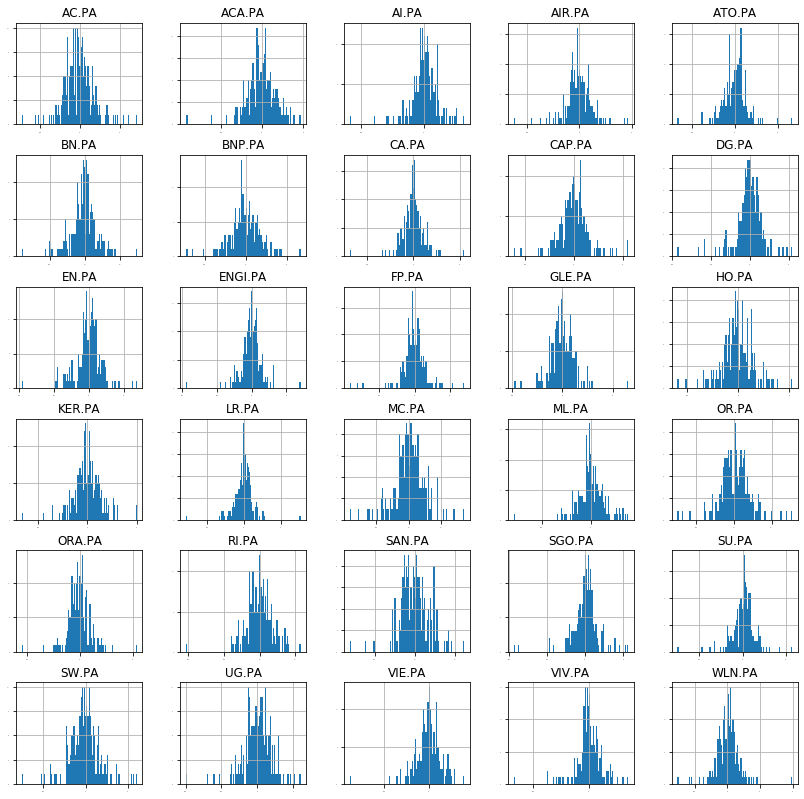

In [404]:
#get histogram per stock return
plots= log_return.hist(bins=100, xlabelsize=-1, ylabelsize=-1, figsize=(14,14))


In [405]:
X=np.cov(np.transpose(log_return))
eigenvalues, eigenvectors = np.linalg.eig(X)
sort_perm = eigenvalues.argsort()[::-1]  
eigenvalues=eigenvalues[sort_perm]
eigenvectors = eigenvectors[:, sort_perm]
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues.real}, index=range(1,len(X)+1))
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

Stock,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,DG.PA,...,ORA.PA,RI.PA,SAN.PA,SGO.PA,SU.PA,SW.PA,UG.PA,VIE.PA,VIV.PA,WLN.PA
formatted_date,,,,,,,,,,,,,,,,,,,,,
2020-02-04,0.008783,0.018069,0.008305,0.031805,0.042185,0.008485,0.019462,0.014342,0.017823,0.016774,...,-0.013370,0.014543,0.010899,0.015529,0.024108,0.010822,0.015748,0.000750,0.008398,-0.007051
2020-02-05,0.019418,0.037490,0.014555,-0.008149,0.001519,-0.003003,0.006471,0.007095,0.000861,0.017940,...,-0.001981,-0.006297,0.015351,0.010030,0.016243,-0.002280,0.019598,0.004859,0.006747,0.054315
2020-02-06,0.004925,0.020486,0.002221,0.000876,0.024742,0.008168,0.015997,0.009594,0.015378,-0.005300,...,0.012222,0.019394,0.040533,0.001994,0.004176,-0.001869,0.015206,0.011124,0.011406,0.032237
2020-02-07,-0.016689,0.009344,-0.002591,-0.001607,0.000247,-0.004348,0.027780,-0.011846,-0.014948,0.001448,...,0.002348,-0.000620,-0.000748,0.001422,-0.003758,0.010751,-0.024441,0.001106,-0.003134,0.013606
2020-02-10,-0.006595,-0.003354,-0.001855,-0.001170,-0.004204,-0.000272,-0.003673,-0.007111,-0.002585,0.007210,...,-0.001174,-0.003105,-0.001176,-0.001137,-0.002303,0.010636,-0.023469,0.000000,0.005477,0.020416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02,0.023062,0.029063,0.028282,0.007957,0.003407,0.008403,0.041659,0.011905,0.017597,0.037052,...,0.005798,0.011494,0.025647,0.042373,0.033966,0.020123,0.025277,0.037439,0.016007,0.001884
2020-11-03,0.032545,0.042619,0.022215,0.049326,0.029823,0.034341,0.059405,-0.009289,0.027854,0.027468,...,-0.014769,0.016998,0.028318,0.026819,0.029253,0.028754,0.017849,0.023222,0.015364,0.010298
2020-11-04,0.014605,0.012277,0.020990,0.034113,0.019615,0.012255,0.002721,0.006696,0.047987,0.018354,...,0.002929,0.023939,0.061157,0.009426,0.008969,-0.008679,0.018451,0.020679,0.006624,0.030273


In [408]:
np.real(eigenvectors)

array([[-2.30159811e-01,  2.53451926e-01, -7.27148398e-02,
         1.62331895e-01,  1.57903721e-01, -3.77732934e-02,
        -1.95362772e-01, -5.25147835e-01, -1.11072491e-01,
         2.08590945e-02,  5.89532488e-02,  1.59921939e-01,
         1.31652000e-01, -5.10167606e-01,  1.52624301e-02,
         9.84669518e-02,  3.38854941e-02,  3.18582504e-01,
        -1.65057046e-01,  7.42604878e-02, -1.42866683e-01,
         9.46176150e-04,  5.48227209e-02,  5.29265513e-02,
         1.11346908e-01, -5.45943900e-03,  2.37775109e-02,
        -6.25075182e-02,  5.44247570e-02, -2.23994788e-03],
       [-2.42926758e-01, -7.17981505e-03, -2.87060522e-01,
        -1.90882281e-01, -1.60404867e-02, -9.46809333e-02,
         1.14149270e-01, -3.65108023e-02, -3.97232427e-02,
         9.21689228e-02, -1.47451017e-01,  3.46713584e-02,
        -3.03229616e-02, -7.08085209e-02,  4.66277211e-03,
         2.26984275e-02, -1.70859461e-01, -2.87696645e-02,
         1.31408889e-01, -3.00328581e-02, -1.32754628e-

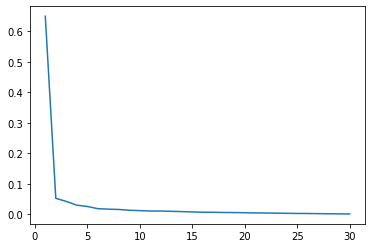

In [413]:
plt.plot(df_eigval["Explained proportion"])